In [0]:
!unzip -q '/content/drive/My Drive/images.zip' -d '/content'

In [9]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import classification_report

batch_size = 64
epochs = 100
IMG_HEIGHT, IMG_WIDTH, channels = 220, 220, 3

dir = '/content/'
train_dir = os.path.join(dir, 'images')

train_gen = ImageDataGenerator(rescale=1.0/255.,
                               validation_split=0.2) # ustawienie podziału na 80 i 20 proc

train_generator = train_gen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset='training')

validation_generator = train_gen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    shuffle=False,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset='validation')

Found 12192 images belonging to 6 classes.
Found 3048 images belonging to 6 classes.


In [10]:
model = Sequential()

# add model layers
model.add(Conv2D(32, kernel_size=3, activation="relu", 
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), data_format="channels_last"))
model.add(Conv2D(32, kernel_size=5, activation="relu"))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
# model.add(Dropout(0.3)) # użycie gdy jest przeuczony, dużo więcej acc niż val_acc
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
# warstwa łącząca conv2d z warstwą dense
model.add(Flatten())
# liczba taka ile wyjść, czyli 6 bo tyle jest typów
model.add(Dense(6, activation="softmax"))

# compile model using accuracy to measure model performance
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
              loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit_generator(train_generator, 
                              validation_data = validation_generator,
                              steps_per_epoch=train_generator.samples // batch_size,
                              use_multiprocessing=True, workers=2, epochs=epochs, shuffle=True)

Epoch 1/100
190/190 [==============================] - 64s 339ms/step - loss: 1.0818 - accuracy: 0.5645 - val_loss: 1.0413 - val_accuracy: 0.7484
Epoch 2/100
190/190 [==============================] - 63s 331ms/step - loss: 0.5561 - accuracy: 0.8175 - val_loss: 0.9636 - val_accuracy: 0.8012
Epoch 3/100
Epoch 2/100
190/190 [==============================] - 63s 332ms/step - loss: 0.4593 - accuracy: 0.8491 - val_loss: 0.6184 - val_accuracy: 0.9085
Epoch 4/100
190/190 [==============================] - 63s 331ms/step - loss: 0.3971 - accuracy: 0.8677 - val_loss: 0.5024 - val_accuracy: 0.9026
Epoch 5/100
190/190 [==============================] - 63s 331ms/step - loss: 0.3419 - accuracy: 0.8917 - val_loss: 0.3955 - val_accuracy: 0.9144
Epoch 6/100
190/190 [==============================] - 63s 333ms/step - loss: 0.2919 - accuracy: 0.9072 - val_loss: 0.3775 - val_accuracy: 0.9209
Epoch 7/100
190/190 [==============================] - 63s 329ms/step - loss: 0.2766 - accuracy: 0.9115 - val_lo

In [11]:
validation_generator.reset()
probabilities = model.predict_generator(validation_generator, verbose=1)

y_test = probabilities.argmax(axis=1)
y_pred = validation_generator.classes
print(classification_report(y_test, y_pred))

scores = model.evaluate_generator(validation_generator, verbose=1)
print(model.metrics_names[0] + " = ", scores[0])
print(model.metrics_names[1] + " = ", scores[1])

48/48 [==============================] - 8s 164ms/step
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       431
           1       0.99      0.99      0.99       507
           2       0.99      0.99      0.99       512
           3       1.00      1.00      1.00       507
           4       1.00      0.86      0.93       588
           5       0.97      0.98      0.97       503

    accuracy                           0.96      3048
   macro avg       0.96      0.96      0.96      3048
weighted avg       0.97      0.96      0.96      3048

48/48 [==============================] - 7s 141ms/step
loss =  0.17062756419181824
accuracy =  0.9619422554969788


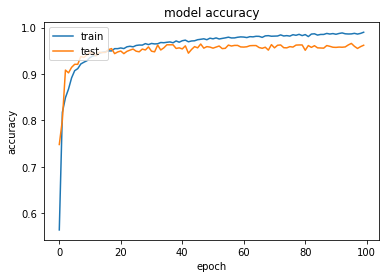

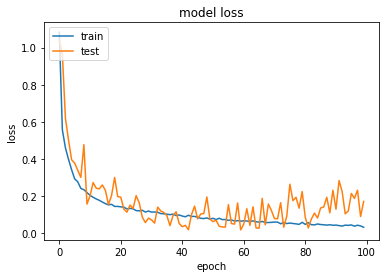

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Zapisanie modelu do pliku
model.save('model.h5')